In [1]:
import numpy as np 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.compiler import transpile


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from project_qsiris.conversion_qiskit_qo import qiskit_to_odyssey, save_odyssey_puzzle

## This runbook allows you to convert any Qiskit circuit to a Quantum Odyssey puzzle

### Example_001:

You can convert any qiskit gates to QO. If there are any problems for the conversion, contact the Owner ;)

Protip: Transpile the Qiskit circuit first and everything will be fine..

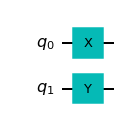

In [2]:
#Add here any Qiskit gates you'd like to be converted to Quantum Odyssey. What you see bellow is an example
#You can change the QuantumRegister between 1 to 5 qubits.
qreg_q = QuantumRegister(2,'q')
circuit = QuantumCircuit(qreg_q)



circuit.x(qreg_q[0])
circuit.y(qreg_q[1])


circuit.draw('mpl')

In [3]:
# This creates the QO puzzle out of your Qiskit circuit. 
# You can save it in two ways: General (as an actual puzzle to be solved) or Editor (to just visualize it in QO).
puzzle = qiskit_to_odyssey(circuit, puzzle_type="General")
# The name of the puzzle (by default example_001). QO puzzles have extension .qpf
save_odyssey_puzzle(puzzle, 'example_001' )

{'IsGateVisible': False, 'GateDefinition': {'ID': 5, 'Name': 'I', 'Type': 0, 'IconPath': 'Artwork/GatesIcons/IGate', 'CompatibleQubits': 1, 'DefinitionMatrix': [[{'Real': 1.0, 'Imaginary': 0.0, 'Magnitude': 1.0, 'Phase': 0.0}, {'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}], [{'Real': 0.0, 'Imaginary': 0.0, 'Magnitude': 0.0, 'Phase': 0.0}, {'Real': 1.0, 'Imaginary': 0.0, 'Magnitude': 1.0, 'Phase': 0.0}]]}, 'CircuitPosition': (0, 0), 'SlaveGatesIDs': {'Item1': 1, 'Item2': 6}, 'MasterGateID': -1, 'OrderInPlacement': 0, 'ID': 7}


TypeError: tuple indices must be integers or slices, not str

### Example_002

If you have more complex gates it would be better if you transpile your circuit first at least for the moment.

In [ ]:
#Step 1: Build the circuit in Qiskit

qreg_q = QuantumRegister(4,'q')
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[1],qreg_q[2])

circuit.h(qreg_q[1])
circuit.z(qreg_q[3])
circuit.u(np.pi/7,np.pi/3,np.pi/5,qreg_q[0])
circuit.swap(qreg_q[0], qreg_q[3])

circuit.draw('mpl')

In [ ]:
#Step 2: Transpile your Qiskit circuit to simple gates to conversion avoid problems 

circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [ ]:
#Step 3: Convert your circuit in dictionary that represents a QO puzzle.
puzzle=qiskit_to_odyssey(circuit, puzzle_type="General")


#Step 4: Save your puzzle 
save_odyssey_puzzle(puzzle, 'example_002' )

### Example_003

In [ ]:
circuit = QuantumCircuit(2,name='matchgate_2Q')

circuit.cx(0,1)
circuit.z(0)
circuit.cry(np.pi/7,1,0)
circuit.cx(0,1)

circuit.draw('mpl')

In [ ]:
circuit = transpile(circuit, basis_gates=['id','u3', 'cx'], optimization_level=1, seed_transpiler=1) 
circuit.draw(output='mpl')

In [ ]:
puzzle = qiskit_to_odyssey(circuit)
save_odyssey_puzzle(puzzle, 'example_003' )

In [ ]:
# Let's see here how the default example_003 puzzle file will look like in Quantum Odyssey
img_circuit = mpimg.imread('img/qiskit_circuit_to_QO.png')
img_circuit_gate = mpimg.imread('img/qo_circuit_as_1gate.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_circuit);
ax[1].imshow(img_circuit_gate);

ax[0].set_title('Circuit in  QO')
#Quantum Odyssey allows compilation of any number of logic gates in a single custom gate (right side bellow=left)
ax[1].set_title('Circuit in QO as a gate')

In [ ]:
#Here is how the QO puzzle file looks like, this is an example
puzzle